## OOI ship data plots

Load and make basic plots of discrete water samples collected on OOI cruise. 

Requires `openpyxl` package for opening Excel files with Pandas.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

The data files are in a repository at https://github.com/tompc35/ooi-ship-data

The original data files were obtained from https://alfresco.oceanobservatories.org

`%ls` is a magic command that lists the files in the current directory (in this case on a Google server somewhere on the cloud).

In [13]:
%ls data/

Endurance-07_SKQ201704S_Discrete_Summary_2017-04-09_ver_1_00.xlsx
Endurance-07_SKQ201704S_Discrete_Summary_README.txt
Endurance-08_SKQ201715S_Discrete_Summary_2017-10-02_ver_1_01.xlsx
Endurance-08_SKQ201715S_Discrete_Summary_README.txt
Endurance-09_SKQ201808S_Discrete_Summary_2018-03-25_ver_1_01-1.xlsx
Endurance-09_SKQ201808S_Discrete_Summary_README-1.txt
readme.txt


Load the data from October 2017 into a Pandas dataframe. Treat column 5 (`Start Time [UTC]`) as dates.

In [14]:
xls_file = 'data/Endurance-08_SKQ201715S_Discrete_Summary_2017-10-02_ver_1_01.xlsx'
df = pd.read_excel(xls_file,parse_dates=[5])

In [15]:
df.head()

,Cruise,Station,Target Asset,Start Latitude [degrees],Start Longitude [degrees],Start Time [UTC],Cast,Cast Flag,Bottom Depth at Start Position [m],CTD File,...,Calculated CO3 [µmol/kg],Calculated Omega-C,Calculated Omega-A,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,SKQ201715S,CE07,CE07SHSM-00007 and CE07SHSM-00006,46.98583,-124.566,2017-10-03 16:43:34,1.0,100.0,89.0,SKQ201715S_ctd001,...,34.9,0.821,0.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKQ201715S,CE07,CE07SHSM-00007 and CE07SHSM-00006,46.98583,-124.566,2017-10-03 16:43:34,1.0,100.0,89.0,SKQ201715S_ctd001,...,-9999999.0,-9999999.000,-9999999.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SKQ201715S,CE07,CE07SHSM-00007 and CE07SHSM-00006,46.98583,-124.566,2017-10-03 16:43:34,1.0,100.0,89.0,SKQ201715S_ctd001,...,-9999999.0,-9999999.000,-9999999.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SKQ201715S,CE07,CE07SHSM-00007 and CE07SHSM-00006,46.98583,-124.566,2017-10-03 16:43:34,1.0,100.0,89.0,SKQ201715S_ctd001,...,144.1,3.051,2.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKQ201715S,CE07,CE07SHSM-00007 and CE07SHSM-00006,46.98583,-124.566,2017-10-03 16:43:34,1.0,100.0,89.0,SKQ201715S_ctd001,...,-9999999.0,-9999999.000,-9999999.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


List all of the variables in the data frame

In [16]:
df.iloc[0]

Cruise                                              SKQ201715S
Station                                                   CE07
Target Asset                 CE07SHSM-00007 and CE07SHSM-00006
Start Latitude [degrees]                              46.98583
Start Longitude [degrees]                           -124.56600
                                           ...                
Unnamed: 80                                                NaN
Unnamed: 81                                                NaN
Unnamed: 82                                                NaN
Unnamed: 83                                                NaN
Unnamed: 84                                                NaN
Name: 0, Length: 85, dtype: object

In [17]:
df.keys()

Index(['Cruise', 'Station', 'Target Asset', 'Start Latitude [degrees]',
       'Start Longitude [degrees]', 'Start Time [UTC]', 'Cast', 'Cast Flag',
       'Bottom Depth at Start Position [m]', 'CTD File', 'CTD File Flag',
       'Niskin/Bottle Position', 'Niskin Flag',
       'CTD Bottle Closure Time [UTC]', 'CTD Pressure [db]',
       'CTD Pressure Flag', 'CTD Depth [m]', 'CTD Latitude [deg]',
       'CTD Longitude [deg]', 'CTD Temperature 1 [deg C]',
       'CTD Temperature 1 Flag', 'CTD Temperature 2 [deg C]',
       'CTD Temperature 2 Flag', 'CTD Conductivity 1 [S/m]',
       'CTD Conductivity 1 Flag', 'CTD Conductivity 2 [S/m]',
       'CTD Conductivity 2 Flag', 'CTD Salinity 1, uncorrected [psu]',
       'CTD Salinity 2, uncorrected [psu]', 'CTD Oxygen, uncorrected [mL/L]',
       'CTD Oxygen Flag', 'CTD Oxygen Saturation [mL/L]',
       'CTD Fluorescence [mg/m^3]', 'CTD Fluorescence Flag',
       'CTD Beam Attenuation [1/m]', 'CTD Beam Transmission [%]',
       'CTD Transmissom

Plot time vs. latitude to show where the ship went on the cruise. It started off Grays Harbor, WA and then went down to the Oregon coast off Newport.

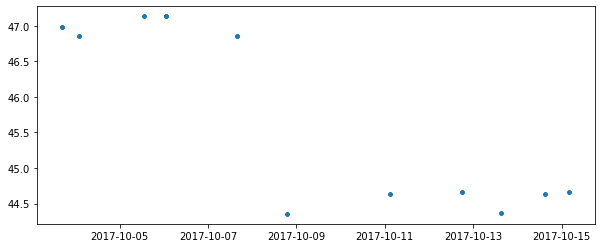

In [18]:
plt.figure(figsize=[10,4])
plt.plot(df['Start Time [UTC]'],df['Start Latitude [degrees]'],'.')

Plot oxygen vs. pressure (depth).

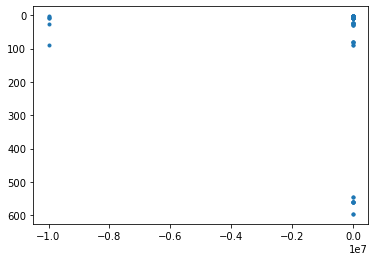

In [19]:
plt.figure()
plt.plot(df['Discrete Oxygen [mL/L]'],df['CTD Pressure [db]'],'.')
plt.gca().invert_yaxis()

There are a lot of -9999999 values, which indicate bad data. We can take a subset of the good values.

In [20]:
goodi = df['Discrete Oxygen Flag'] == 100

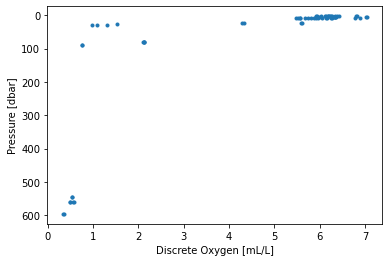

In [21]:
plt.figure()
plt.plot(df['Discrete Oxygen [mL/L]'][goodi],df['CTD Pressure [db]'][goodi],'.')
plt.xlabel('Discrete Oxygen [mL/L]')
plt.ylabel('Pressure [dbar]')
plt.gca().invert_yaxis()

Compare the bottle oxygen vs. CTD oxygen values from the ship rosette.

Text(0, 0.5, 'CTD Oxygen, uncorrected [mL/L]')

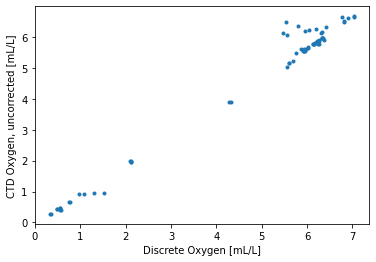

In [22]:
plt.figure()
plt.plot(df['Discrete Oxygen [mL/L]'][goodi],df['CTD Oxygen, uncorrected [mL/L]'][goodi],'.')
plt.xlabel('Discrete Oxygen [mL/L]')
plt.ylabel('CTD Oxygen, uncorrected [mL/L]')

In [23]:
result = stats.linregress(df['Discrete Oxygen [mL/L]'][goodi],df['CTD Oxygen, uncorrected [mL/L]'][goodi])

In [24]:
print('slope',result.slope)
print('intercept',result.intercept)

slope 0.9775428688100574
intercept -0.10838752493990178


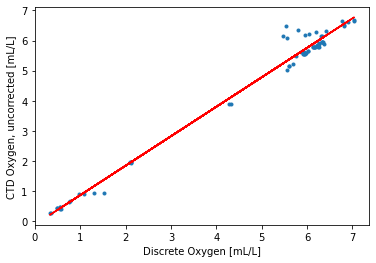

In [25]:
x = df['Discrete Oxygen [mL/L]'][goodi]
y = result.slope*x + result.intercept

plt.figure()
plt.plot(df['Discrete Oxygen [mL/L]'][goodi],df['CTD Oxygen, uncorrected [mL/L]'][goodi],'.')
plt.plot(x,y,'r-')
plt.xlabel('Discrete Oxygen [mL/L]')
plt.ylabel('CTD Oxygen, uncorrected [mL/L]');